### Statistical Tests - Practical Applications

The main objective is to understand the statistical tests and their implementation on real data in Python which will help in feature selection.

Terminologies
Before going into the types of statistical tests and their implementation, it is necessary to understand the meanings of some terminologies.

Hypothesis Testing

Hypothesis Testing in statistics is a method to test the results of experiments or surveys to see if you have meaningful results. It is useful when you want to infer about a population based on a sample or correlation between two or more samples.

Null Hypothesis

This hypothesis states that there is no significant difference between sample and population or among different populations. It is denoted by H0.

Ex – We assume that the mean of 2 samples is equal.

Alternate Hypothesis

The statement contrary to the null hypothesis comes under the alternate hypothesis. It is denoted by H1.

Ex – We assume that the mean of the 2 samples is unequal.

Critical Value

It is a point on the scale of the test statistic beyond which the null hypothesis is rejected. Higher the critical value, lower the probability of 2 samples belonging to the same distribution. The critical value for any test can

p-value

p-value stands for ‘probability value’; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.

Degree of freedom

The degree of freedom is the number of independent variables. This concept is used in calculating t statistic and chi-square statistic.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
df=pd.read_csv('loan_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Statistical Tests

A statistical test is a way to determine whether the random variable is following the null hypothesis or alternate hypothesis. It basically tells whether the sample and population or two/ more samples have significant differences. You can use various descriptive stats such as mean, median, mode, range, or standard deviation for this purpose. However, we generally use the mean. The statistical test gives you a number which is then compared with the p-value. If its value is more than the p-value you accept the null hypothesis, else you reject it.

The procedure for implementing each statistical test will be as follows:

We calculate the statistic value using the mathematical formula
We then calculate the critical value using statistic tables
With the help of critical value, we calculate the p-value
If p-value> 0.05 we accept the null hypothesis else we reject it
Now you have an understanding of feature selection and statistical tests, we can move towards the implementation of various statistical tests along with their meaning. 

### Z-Test

A Z-test is used to compare the mean of two given samples and infer whether they are from the same distribution or not. We do not implement Z-test when the sample size is less than 30.

A Z-Test may be a one-sample Z test or a two-sample Z test.

The One-Sample t-Test determines whether the sample mean is statistically different from a known or hypothesized population mean. The two-sample Z-test compares 2 independent variables.

We will implement a two-sample Z test.

Please note that we will implement 2 sample z-test where one variable will be categorical with two categories and the other variable will be continuous to apply the z-test.

Here we will be using the Gender categorial variable and ApplicantIncome continuous variable. Gender has 2 groups: male and female. Therefore the hypothesis will be:

Null Hypothesis: There is no significant difference between the mean Income of males and females.

Alternate Hypothesis: There is a significant difference between the mean Income of males and females.

In [ ]:
M_mean=df.loc[df['Gender']=='Male','ApplicantIncome'].mean()
F_mean=df.loc[df['Gender']=='Female','ApplicantIncome'].mean()
M_std=df.loc[df['Gender']=='Male','ApplicantIncome'].std()
F_std=df.loc[df['Gender']=='Female','ApplicantIncome'].std()
no_of_M=df.loc[df['Gender']=='Male','ApplicantIncome'].count()
no_of_F=df.loc[df['Gender']=='Female','ApplicantIncome'].count()

In [42]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), pval
z,p= twoSampZ(M_mean,F_mean,0,M_std,F_std,no_of_M,no_of_F)
print('Z =',  z,'p =', p)
if p<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

Z = 1.828 p = 0.06759726635832197
we accept null hypothesis


### T-Test

A t-test is also used to compare the mean of two given samples like the Z-test. However, It is implemented when the sample size is less than 30. It assumes a normal distribution of the sample. It can also be one-sample or two-sample. The degree of freedom is calculated by n-1 where n is the number of samples.

It will be implemented the same as Z-test. The only condition is sample size should be less than 30. I have shown you Z- Test implementation. Now, you can try your hands on the T-Test.

#### Try T-Test

### Correlation Test

A correlation test is a metric to evaluate the extent to which variables are associated with one another.

Please note that the variables must be continuous to apply the correlation test.

There are several methods for correlation tests i.e. Covariance, Pearson correlation coefficient, Spearman rank correlation coefficient, etc.

We will use the person correlation coefficient since it is independent of the values of variables.

Its values lie between -1 and 1.

If the value of r is 0, it means there is no relationship between variables X and Y.

If the value of r is between 0 and 1, it means there is a positive relation between X and Y, and their strength increases from 0 to 1. Positive relation means if the value of X increases, the value of Y also increases.

If the value of r is between -1 and 0, it means there is a negative relation between X and Y, and their strength decreases from -1 to 0. Negative relation means if the value of X increases, the value of Y decreases.

Here we will be using two continuous variables or features – Loan Amount and Applicant Income. We will conclude whether there is a linear relation between Loan Amount and Applicant Income with the Pearson correlation Coefficient value and also draw the chart between them.

In [43]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
pcc = np.corrcoef(df.ApplicantIncome, df.LoanAmount)
print(pcc)

[[1.         0.56562046]
 [0.56562046 1.        ]]


The values on the diagonals indicate the correlation of features with themselves. 0.56 represent that there is some correlation between the two features.

We can also draw the chart as follows:

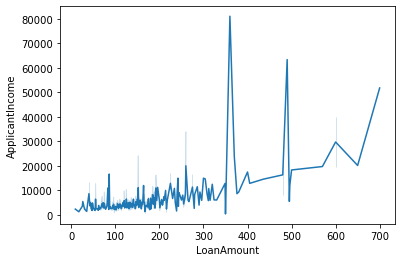

In [44]:
sns.lineplot(data=df,x='LoanAmount',y='ApplicantIncome')

### ANOVA

ANOVA stands for Analysis of variance. As the name, suggests it uses variance as its parameter to compare multiple independent groups. ANOVA can be one-way ANOVA or two-way ANOVA. One-way ANOVA is applied when there are three or more independent groups of a variable. We will implement the same in python.

WE calculated F-Statistic

In [46]:
df = pd.read_csv(r"C:\Users\Purushotham\Desktop\deloitte\visualization\visualization\datasets\tips.csv")
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
df_anova = df[['total_bill','day']]
grps = pd.unique(df.day.values)
d_data = {grp:df_anova['total_bill'][df_anova.day == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sun'], d_data['Sat'], d_data['Thur'],d_data['Fri'])

In [48]:
print('F ={},p={}'.format(F,p))

F =2.7674794432863363,p=0.04245383328952047


We reject null hypothesis

### Chi-Square Test

This test is applied when you have two categorical variables from a population. It is used to determine whether there is a significant association or relationship between the two variables.

There are 2 types of chi-square tests: chi-square goodness of fit and chi-square test for independence, we will implement the latter one.

The degree of freedom in the chi-square test is calculated by (n-1)*(m-1) where n and m are numbers of rows and columns respectively.

In [25]:
dataset_table=pd.crosstab(df['gender'],df['smoker'])
dataset_table

smoker,No,Yes
gender,,
Female,54,33
Male,97,60


In [49]:
observed=dataset_table.values
val2=stats.chi2_contingency(dataset_table)
expected=val2[3]

In [50]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]


In [51]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=1)

In [52]:
chi_square_statistic

0.001934818536627623

In [53]:
p_value

0.964915107315732

Since the p-value is greater than 0.05, we accept the null hypothesis. We conclude that there is no significant association between the two features.